## 1. Introduction

Instagram is a major platform for sharing content, building audiences, and promoting ideas or products. Understanding what drives engagement on Instagram can help creators and businesses design more effective posts. In this project, I analyze post-level data from a single Instagram account to explore how different factors relate to engagement and follows.

The main question I focus on is: **How do engagement behaviors (likes, comments, saves, and shares), hashtags, and discovery sources (Home, Hashtags, Explore) relate to impressions and follows for Instagram posts from this account?**

By looking at metrics such as impressions, engagement, and follower actions, I aim to identify patterns that may help improve future content strategy.


In [1]:
import pandas as pd

df = pd.read_csv("Instagram_data.csv", encoding="latin1")
df.head()


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


## 2. Data Description

The dataset contains 119 Instagram posts from a single account. Each row represents one post and includes:

- **Impressions**: total number of times the post was seen.
- **From Home, From Hashtags, From Explore, From Other**: number of impressions that came from each discovery source.
- **Saves, Comments, Shares, Likes**: counts of different types of engagement.
- **Profile Visits, Follows**: number of profile visits and new followers generated by the post.
- **Caption**: the text caption for the post.
- **Hashtags**: the hashtags used in the post.

There are no missing values in any of the columns, so the dataset is complete and ready for analysis.


In [2]:
# Summary table
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

## 3. Methods and Analysis Plan

To answer my research question, I focus on how different factors relate to engagement and follows. I define a new variable called **Engagement**, which combines likes, comments, saves, and shares into a single measure of how users interacted with each post. I also create a **Hashtag_Count** variable that counts how many hashtags are used in each post. In addition, I calculate the share of impressions from hashtags and from the Explore page.

I use three main types of analysis:

1. **Descriptive statistics** to understand the typical ranges and variation in impressions, engagement, hashtag use, and follows.
2. **Correlations and scatterplots** to explore relationships between variables such as impressions and engagement, hashtag count and engagement, and the share of impressions from hashtags or Explore and engagement.
3. **Visualizations** (such as scatterplots and bar charts) to make the patterns easier to see and interpret.

These methods allow me to explore how different factors are related to performance without making overly complex models.


In [3]:
df['Engagement'] = df['Likes'] + df['Comments'] + df['Saves'] + df['Shares']

# Create Hashtag Count
def count_hashtags(tag_string):
    if pd.isna(tag_string):
        return 0
    return sum(1 for token in str(tag_string).split() if token.startswith('#'))

df['Hashtag_Count'] = df['Hashtags'].apply(count_hashtags)


df['Hashtag_Share'] = df['From Hashtags'] / df['Impressions']
df['Explore_Share'] = df['From Explore'] / df['Impressions']

df[['Impressions','Engagement','Hashtag_Count','Hashtag_Share','Explore_Share']].head()


,Impressions,Engagement,Hashtag_Count,Hashtag_Share,Explore_Share
0,3920,274,22,0.262245,0.157908
1,5394,439,18,0.340749,0.217649
2,4021,184,18,0.295449,0.000000
3,4528,402,11,0.137147,0.205830
4,2518,228,29,0.101271,0.110802


In [4]:
df[['Impressions','Engagement','Hashtag_Count','Profile Visits','Follows']].describe()

,Impressions,Engagement,Hashtag_Count,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,343.117647,18.957983,50.621849,20.756303
std,4843.780105,238.849012,4.861462,87.088402,40.921580
min,1941.000000,104.000000,10.000000,4.000000,0.000000
25%,3467.000000,202.500000,17.000000,15.000000,4.000000
50%,4289.000000,288.000000,18.000000,23.000000,8.000000
75%,6138.000000,379.500000,21.000000,42.000000,18.000000
max,36919.000000,1721.000000,30.000000,611.000000,260.000000


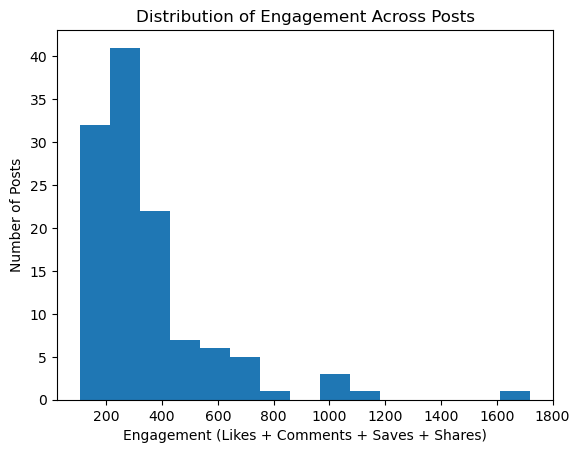

In [5]:
import matplotlib.pyplot as plt

plt.hist(df['Engagement'], bins=15)
plt.xlabel('Engagement (Likes + Comments + Saves + Shares)')
plt.ylabel('Number of Posts')
plt.title('Distribution of Engagement Across Posts')
plt.show()


### Overall Engagement Patterns

Overall, posts in this dataset reach a few thousand impressions on average, with some posts reaching much higher numbers. Engagement (likes + comments + saves + shares) also varies widely, which suggests that some posts perform much better than others. The histogram shows that most posts have moderate engagement, while a smaller number of posts achieve very high engagement, creating a long tail of strong performers. This variation is useful because it allows me to compare the characteristics of more and less successful posts.


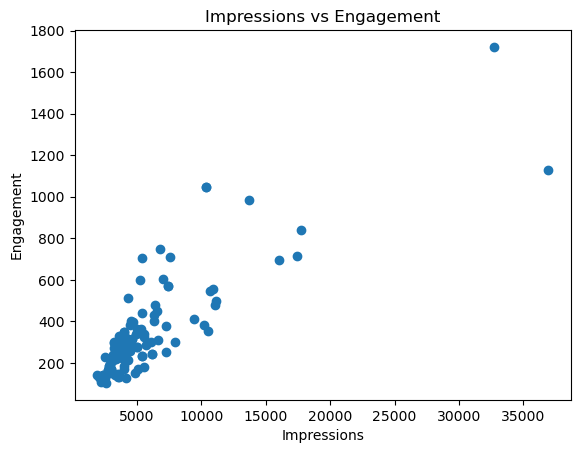

In [6]:
# Correlation
df[['Impressions','Engagement']].corr()

# Scatterplot
plt.scatter(df['Impressions'], df['Engagement'])
plt.xlabel('Impressions')
plt.ylabel('Engagement')
plt.title('Impressions vs Engagement')
plt.show()


### 4.3 Hashtags and Engagement

When I look at the relationship between the number of hashtags and engagement, the correlation is relatively small. The scatterplot suggests that simply adding more hashtags does not strongly guarantee higher engagement. Posts with both low and high hashtag counts can perform well or poorly. This may mean that the specific hashtags or the quality of the content matter more than just the number of hashtags used.



In [8]:
# Quick summary
df[['From Home','From Hashtags','From Explore','From Other']].describe()

# Relationships between shares and engagement, and impression shares
df[['Hashtag_Share','Explore_Share','Engagement','Follows']].corr()


,Hashtag_Share,Explore_Share,Engagement,Follows
Hashtag_Share,1.000000,-0.365744,0.015260,0.039864
Explore_Share,-0.365744,1.000000,0.545048,0.559885
Engagement,0.015260,0.545048,1.000000,0.688642
Follows,0.039864,0.559885,0.688642,1.000000


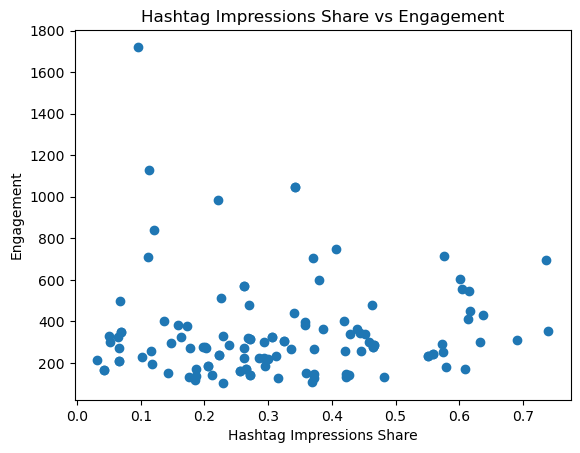

In [9]:
plt.scatter(df['Hashtag_Share'], df['Engagement'])
plt.xlabel('Hashtag Impressions Share')
plt.ylabel('Engagement')
plt.title('Hashtag Impressions Share vs Engagement')
plt.show()


### Most impressions come from the home feed and hashtags, with a smaller but sometimes important contribution from the Explore page. When I compare the share of impressions from hashtags and Explore with engagement and follows, I see that posts that reach more people through these discovery tools can sometimes achieve higher engagement, but the relationships are not perfectly consistent. This suggests that being discovered through hashtags or Explore can help a post perform better, but it is not the only factor that determines success.


## 5. Discussion and Conclusion

In this preliminary analysis, I found that posts with higher impressions usually have higher engagement, which makes sense because they are seen by more people. However, there is still a lot of variation, and some posts perform better than others even with similar impression counts. This suggests that content quality, topic, or timing might also matter.

The number of hashtags used does not appear to be a strong predictor of engagement by itself. Posts with many hashtags do not always perform better, so simply adding more hashtags is probably not enough to guarantee success. Discovery sources such as hashtags and the Explore page do seem to help some posts reach larger audiences, and posts that get more impressions from these sources can sometimes convert that reach into more engagement and follows.

Overall, these results suggest that a mix of reach (impressions), discovery (hashtags and Explore), and user actions (likes, saves, shares) all play a role in how well a post performs. In the final project, I plan to refine these analyses, improve the visualizations, and look more closely at which kinds of posts are driving the highest engagement and follows.


## 6. Limitations and Future Work

This project has several limitations. First, the dataset comes from a single Instagram account, so the results may not generalize to other accounts, industries, or audiences. Second, the data does not include the media type (image, video, or carousel), posting time, or follower count, which limits my ability to compare different formats or calculate engagement rates relative to audience size. Third, while I have access to captions and hashtags, I mainly focus on simple counts and overall patterns rather than detailed text analysis.

In future work, it would be useful to include additional features such as media type, posting time, and account-level information. I could also apply more advanced methods, such as regression models or natural language processing on captions and hashtags, to better understand which specific content characteristics drive engagement and follower growth.
